# EDA(Exploratory Data Analysis)

In [1]:
import sys
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Bg_pre2'

In [2]:
# To import the custom module from a specific path
sys.path.insert(0, os.path.join(current_dir, '../'))

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# from ydata_profiling import ProfileReport
from Utools.ML_figures.figures import element_prevalence
%matplotlib inline
%config InlineBackend.figure_format='retina'

## MP DATA

In [5]:
# read data from mp_raw_data.csv
raw_df = pd.read_csv(os.path.join(current_dir, './Data/mp_raw_data.csv'))
raw_df.head()

,material_id,composition,nsites,crystal_system,space_group,volume,density,density_atomic,efermi,energy_per_atom,formation_energy_per_atom,is_gap_direct,band_gap
0,mp-567334,Ag8 B48 Cl48,104,Cubic,205,1920.521818,2.666186,18.466556,0.446000,-8.609923,-0.736951,True,2.7028
1,mp-568392,Ag40 Te16 Br12,68,Orthorhombic,63,1688.336988,7.194734,24.828485,2.536429,-3.067222,-0.366432,False,0.8722
2,mp-560328,Ag30 P8 S32 Cl6,76,Cubic,220,1709.591255,4.587131,22.494622,2.458781,-4.062215,-0.481548,False,1.2888
3,mp-4691,Ag4 C2 O6,12,Monoclinic,11,150.041421,6.103459,12.503452,1.709619,-6.049623,-1.089885,False,0.4736
4,mp-1196546,Ag12 Ge6 S36 O126,180,Trigonal,147,2544.837686,3.197654,14.137987,0.457826,-6.234630,-1.599755,False,2.8072


In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   material_id                5520 non-null   object 
 1   composition                5520 non-null   object 
 2   nsites                     5520 non-null   int64  
 3   crystal_system             5520 non-null   object 
 4   space_group                5520 non-null   int64  
 5   volume                     5520 non-null   float64
 6   density                    5520 non-null   float64
 7   density_atomic             5520 non-null   float64
 8   efermi                     5516 non-null   float64
 9   energy_per_atom            5520 non-null   float64
 10  formation_energy_per_atom  5520 non-null   float64
 11  is_gap_direct              5520 non-null   bool   
 12  band_gap                   5520 non-null   float64
dtypes: bool(1), float64(7), int64(2), object(3)
memo

In [6]:
raw_df.isna().any()

material_id                  False
formula_pretty               False
composition                  False
nsites                       False
crystal_system               False
space_group                  False
point_group                  False
volume                       False
density                      False
density_atomic               False
formation_energy_per_atom    False
energy_above_hull            False
is_gap_direct                False
band_gap                     False
dtype: bool

In [7]:
raw_df.describe()

,nsites,space_group,volume,density,density_atomic,efermi,energy_per_atom,formation_energy_per_atom,band_gap
count,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5516.000000,5520.000000,5520.000000,5520.000000
mean,31.741486,78.711957,677.302766,4.046344,21.819381,2.011710,-6.870333,-1.465194,1.505401
std,28.352843,72.811101,680.582744,1.165021,9.237503,1.986885,3.793738,0.816445,0.846588
min,2.000000,1.000000,16.207758,0.212291,6.739537,-5.988508,-26.431478,-3.874204,0.000100
25%,12.000000,14.000000,244.902116,3.218569,14.205438,0.819006,-7.762099,-2.075685,0.811175
50%,24.000000,62.000000,463.685124,3.971931,20.052569,2.009598,-5.940377,-1.335218,1.504500
75%,40.000000,142.000000,880.056570,4.761991,28.161710,3.240514,-4.469116,-0.806755,2.222700
max,252.000000,230.000000,6754.249602,9.498590,211.507846,10.933763,-1.641748,-0.001509,2.998300


- We can see that the minimum of band gap is 0.0001eV and the maximum is 2.998eV.

In [8]:
# profile = ProfileReport(raw_df.copy(), title='Pandas Profiling Report of raw dataset', html={'style':{'full_width':True}})
# profile.to_widgets()

In [9]:
# Check for and remove duplicates
data_df = raw_df.drop_duplicates()

print(f'DataFrame shape after dropping duplicates: {data_df.shape}')

DataFrame shape after dropping duplicates: (5520, 13)


In [10]:
# Check the type of compound
composition_type = data_df['composition'].unique()
composition_type
display(len(composition_type))

5499

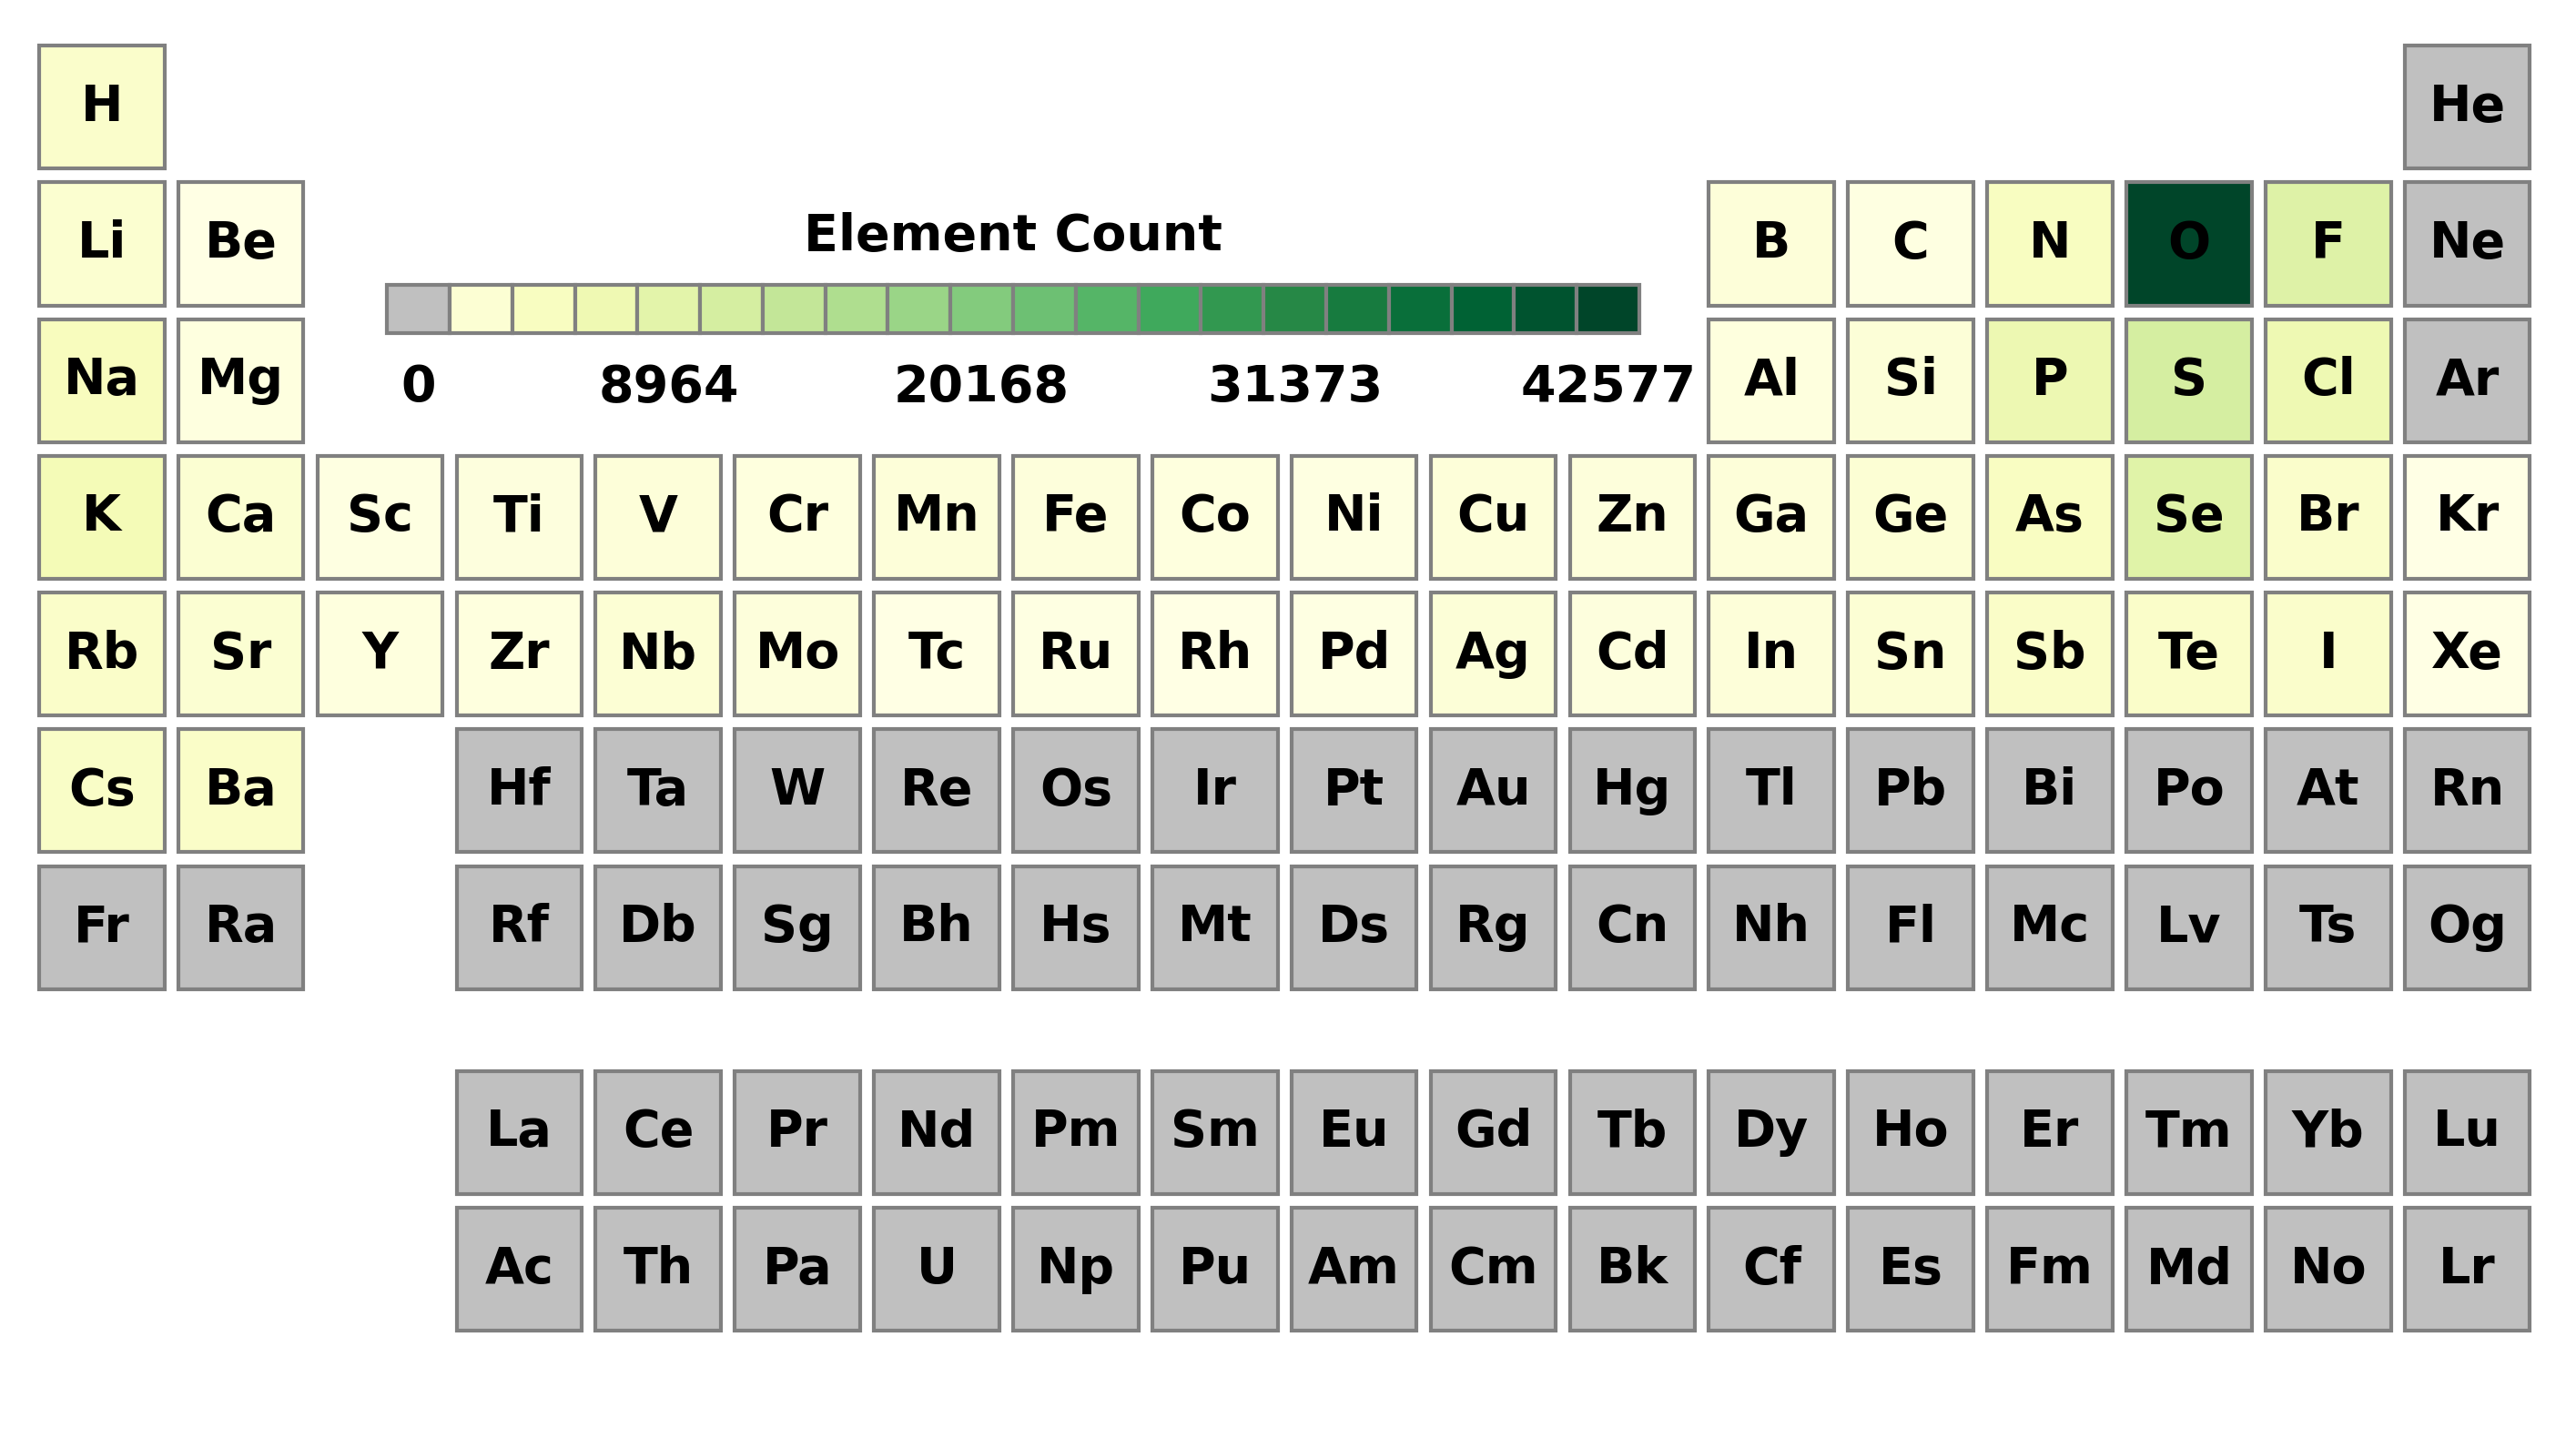

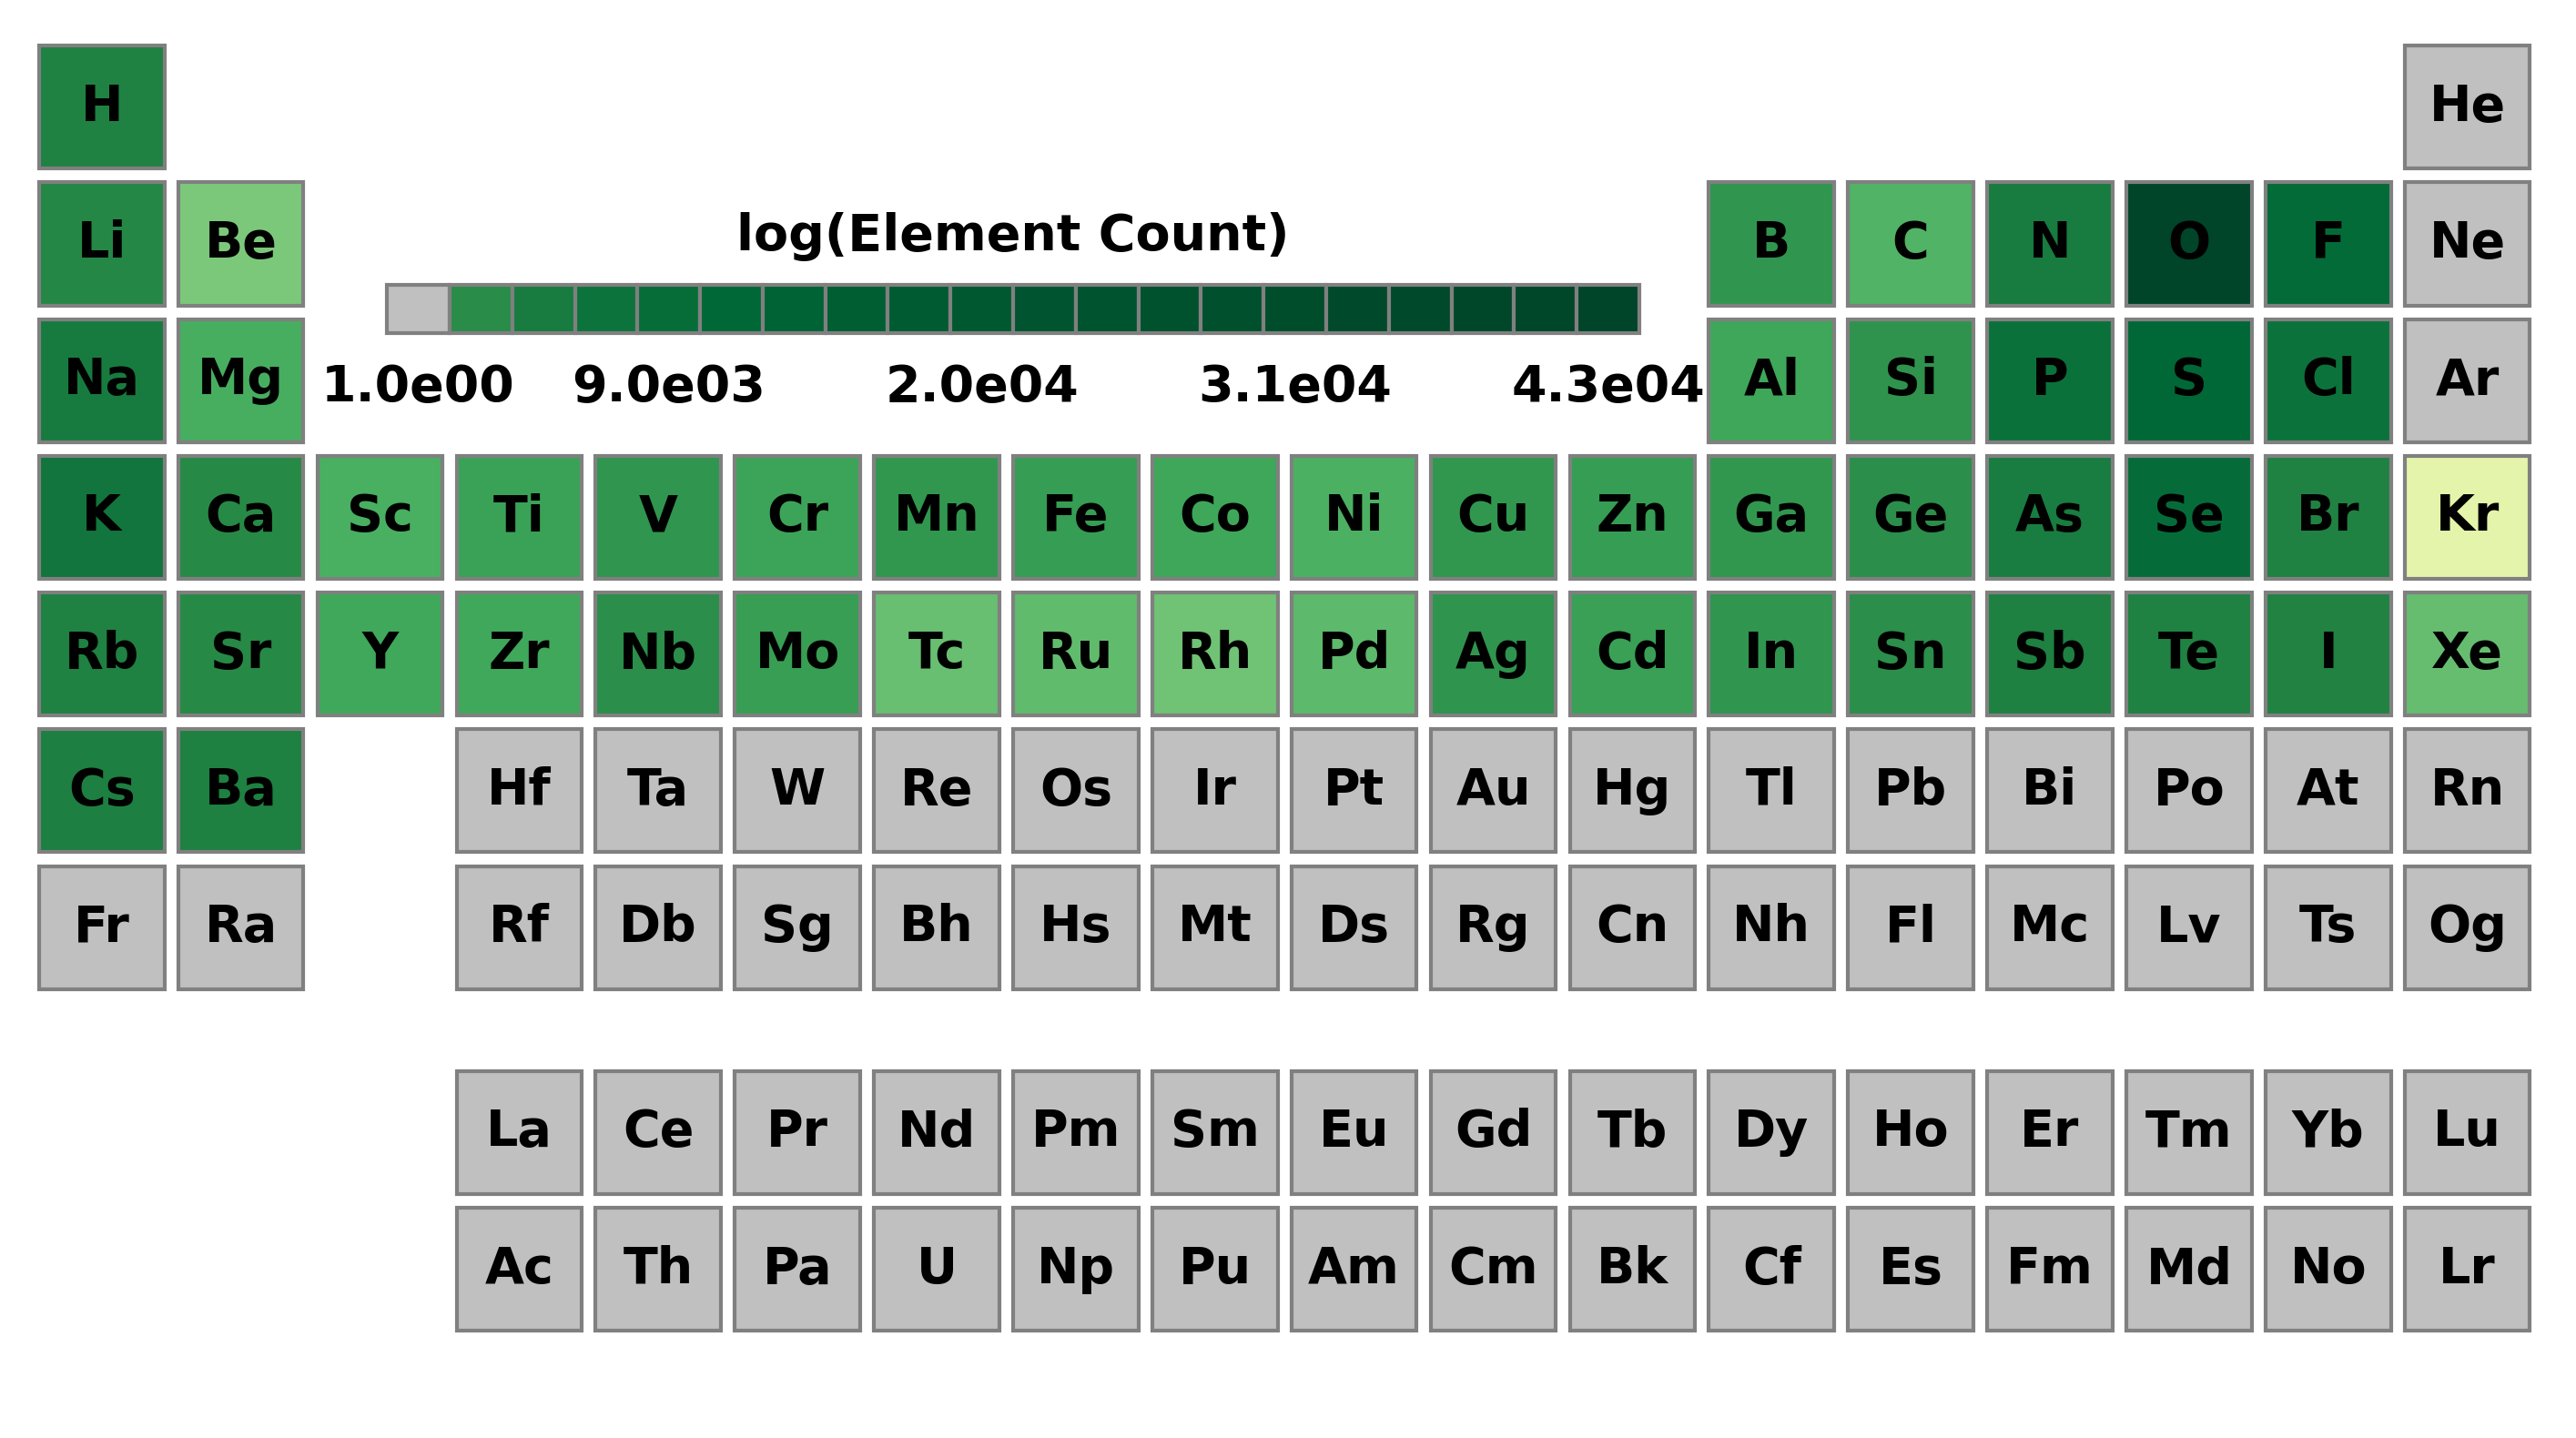

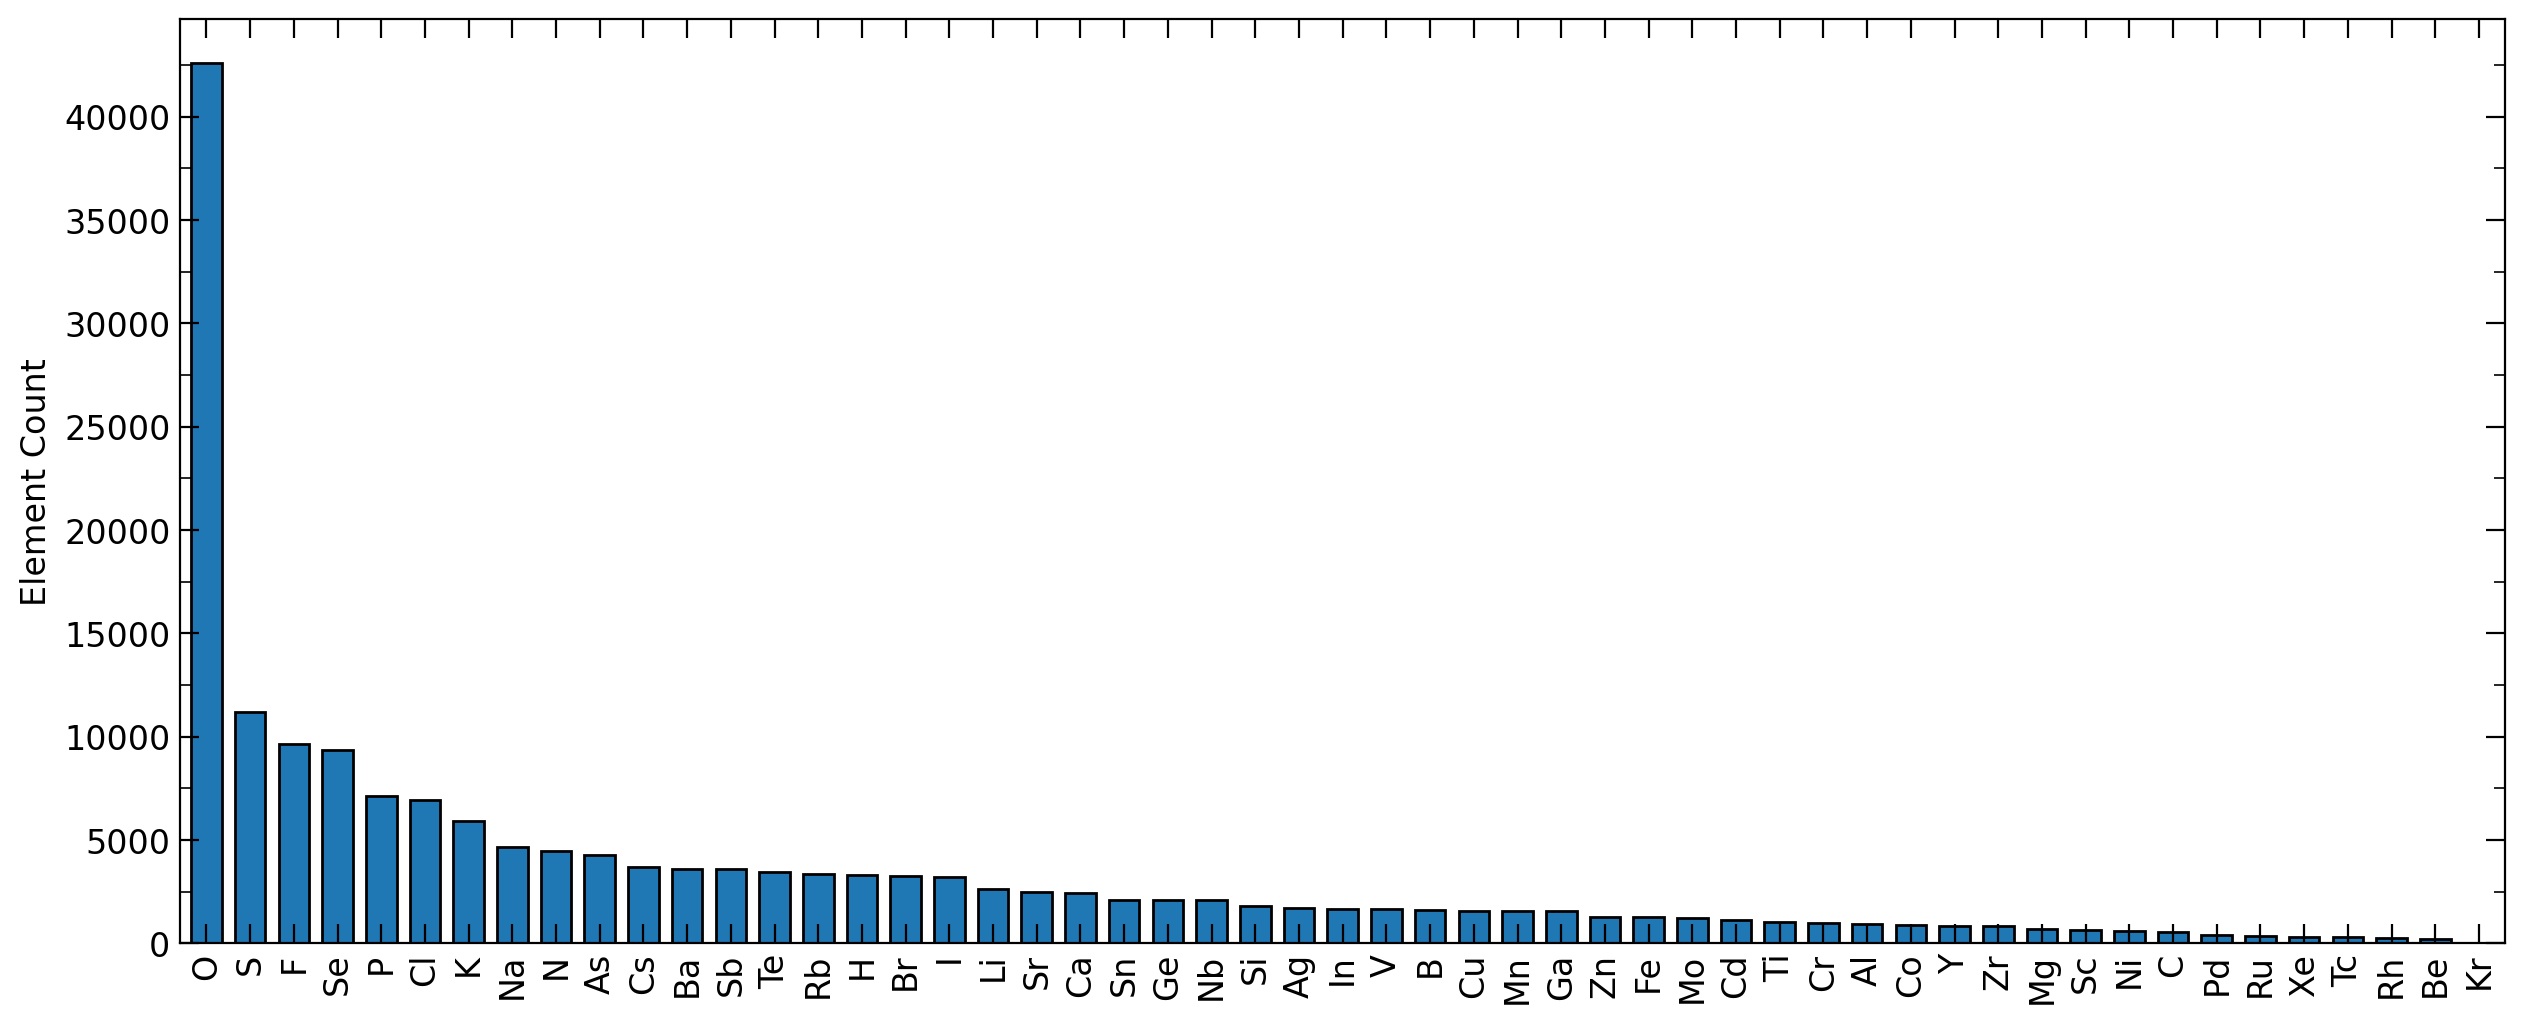

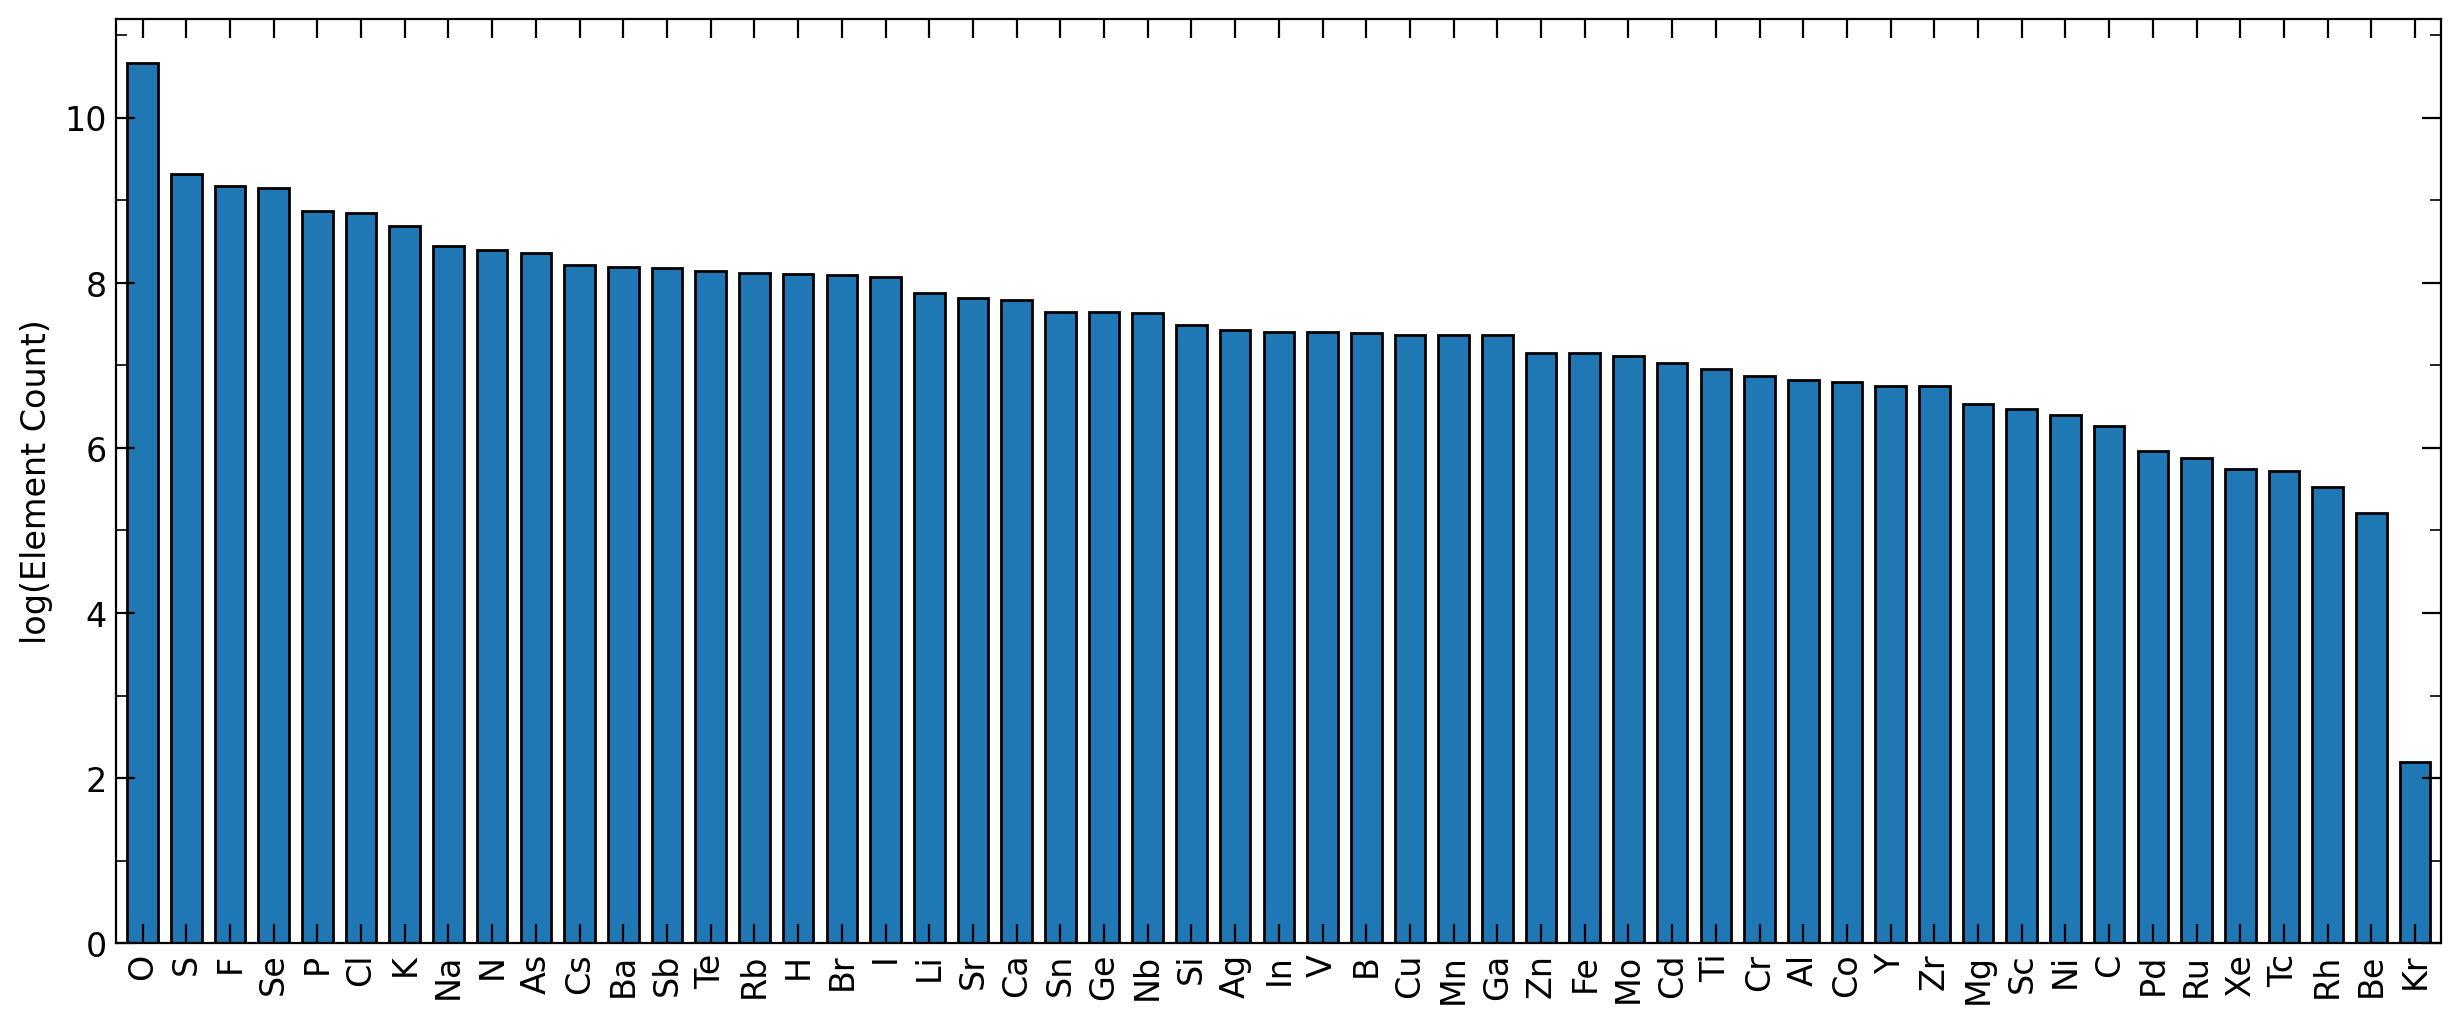

In [14]:
# Visualizing elemental prevalence in the dataset

current_dir = os.getcwd()
os.chdir('./Utools')  # Change to where ML_figures is a direct subdirectory

formula = data_df.iloc[:, 1]

save_dir = os.path.join(current_dir, './figures/element_prevalence/mp')
os.makedirs(save_dir, exist_ok=True)
element_prevalence(formula,
                   name='element_prevalence_ptable',
                   save_dir=save_dir,
                   log_scale=False)
element_prevalence(formula,
                   name='log_element_prevalence_ptable',
                   save_dir=save_dir,
                   log_scale=True)

plt.rcParams.update({'font.size': 12})
element_prevalence(formula,
                   name='element_prevalence',
                   save_dir=save_dir,
                   ptable_fig=False,
                   log_scale=False)
element_prevalence(formula,
                   name='log_element_prevalence',
                   save_dir=save_dir,
                   ptable_fig=False,
                   log_scale=True)

os.chdir(current_dir)  # Return to previous directory

### Data distribution

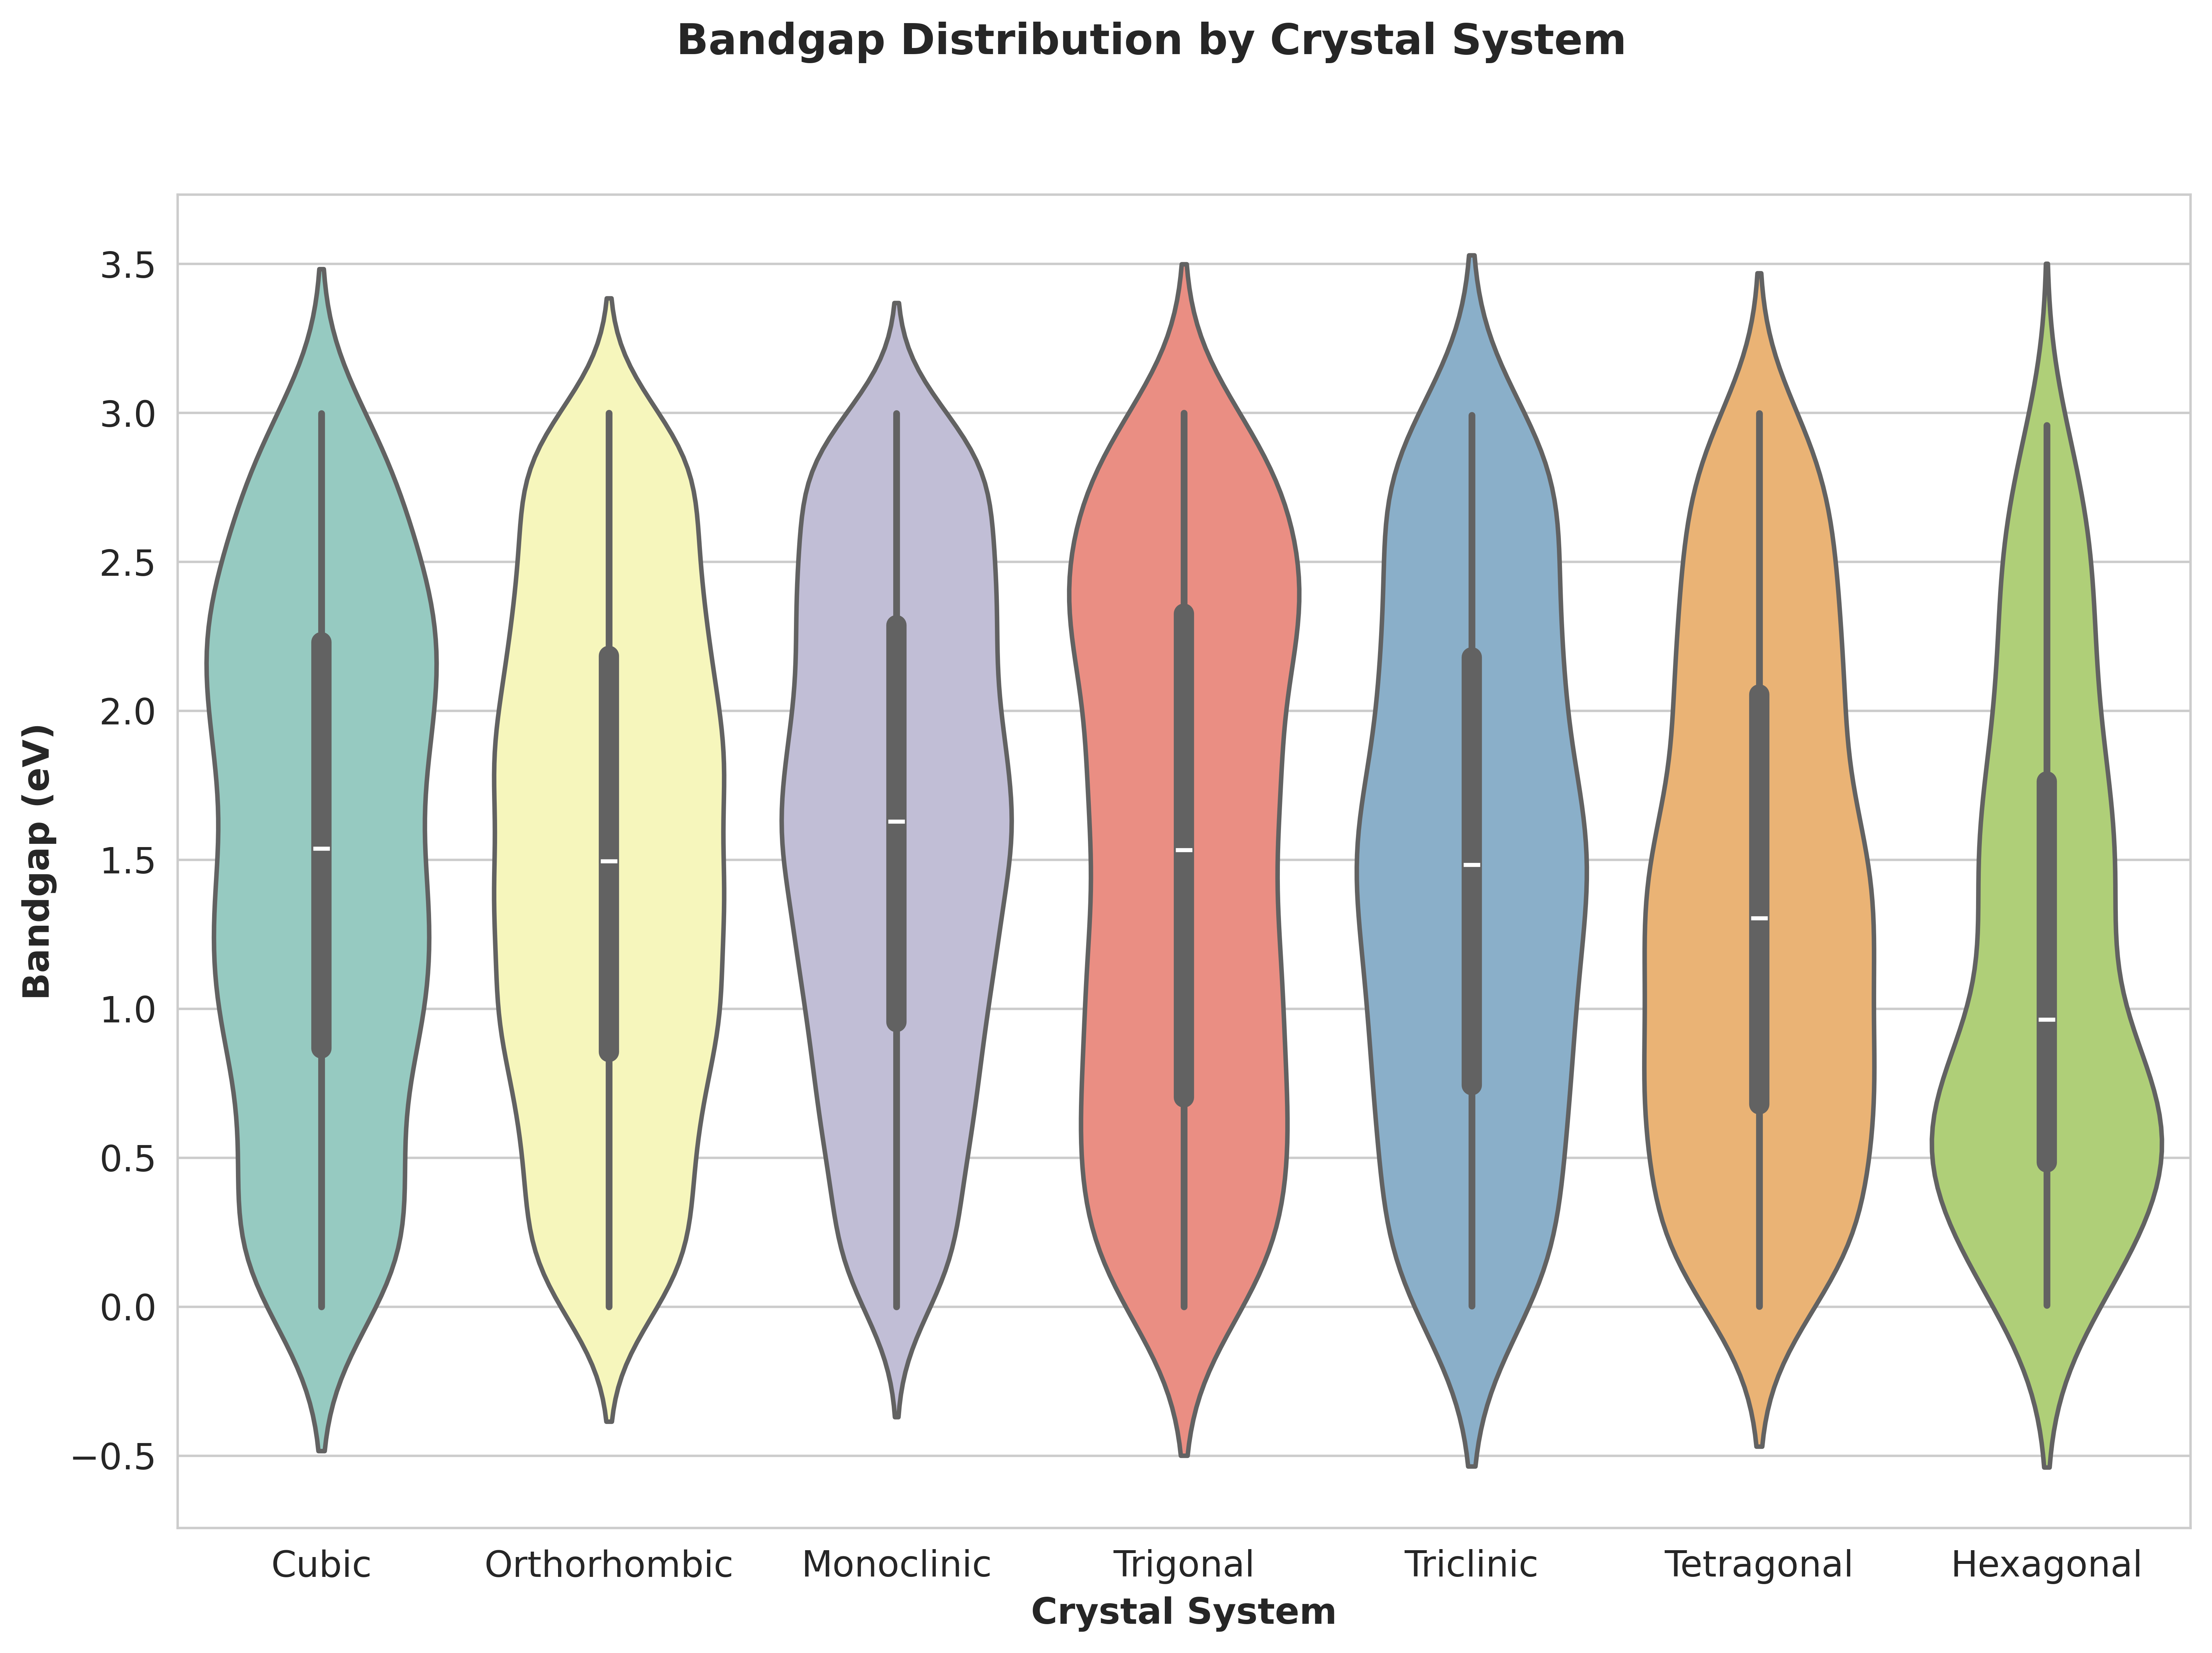

In [15]:
# Draw a violin plot of the distribution of the bandgap with respect to the crystal system. 
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8), dpi=300)

# Set the color palette
ax = sns.violinplot(
    x="crystal_system",
    y="band_gap",
    data=data_df,
    hue="crystal_system",
    palette="Set3",  # Set3, RdBu
    linewidth=1.5,    
    density_norm="count"     
)

plt.suptitle("Bandgap Distribution by Crystal System", fontsize=14, weight="bold")
plt.xlabel("Crystal System", fontsize=12, weight="bold")
plt.ylabel("Bandgap (eV)", fontsize=12, weight="bold")
# Save the figure
# Create the directory if it doesn't exist
save_dir = os.path.join(current_dir, 'figures', 'data_distribution', 'mp')
os.makedirs(save_dir, exist_ok=True)
plt.savefig(os.path.join(save_dir, 'bandgap_crystal_system.png'), dpi=300)
plt.show()

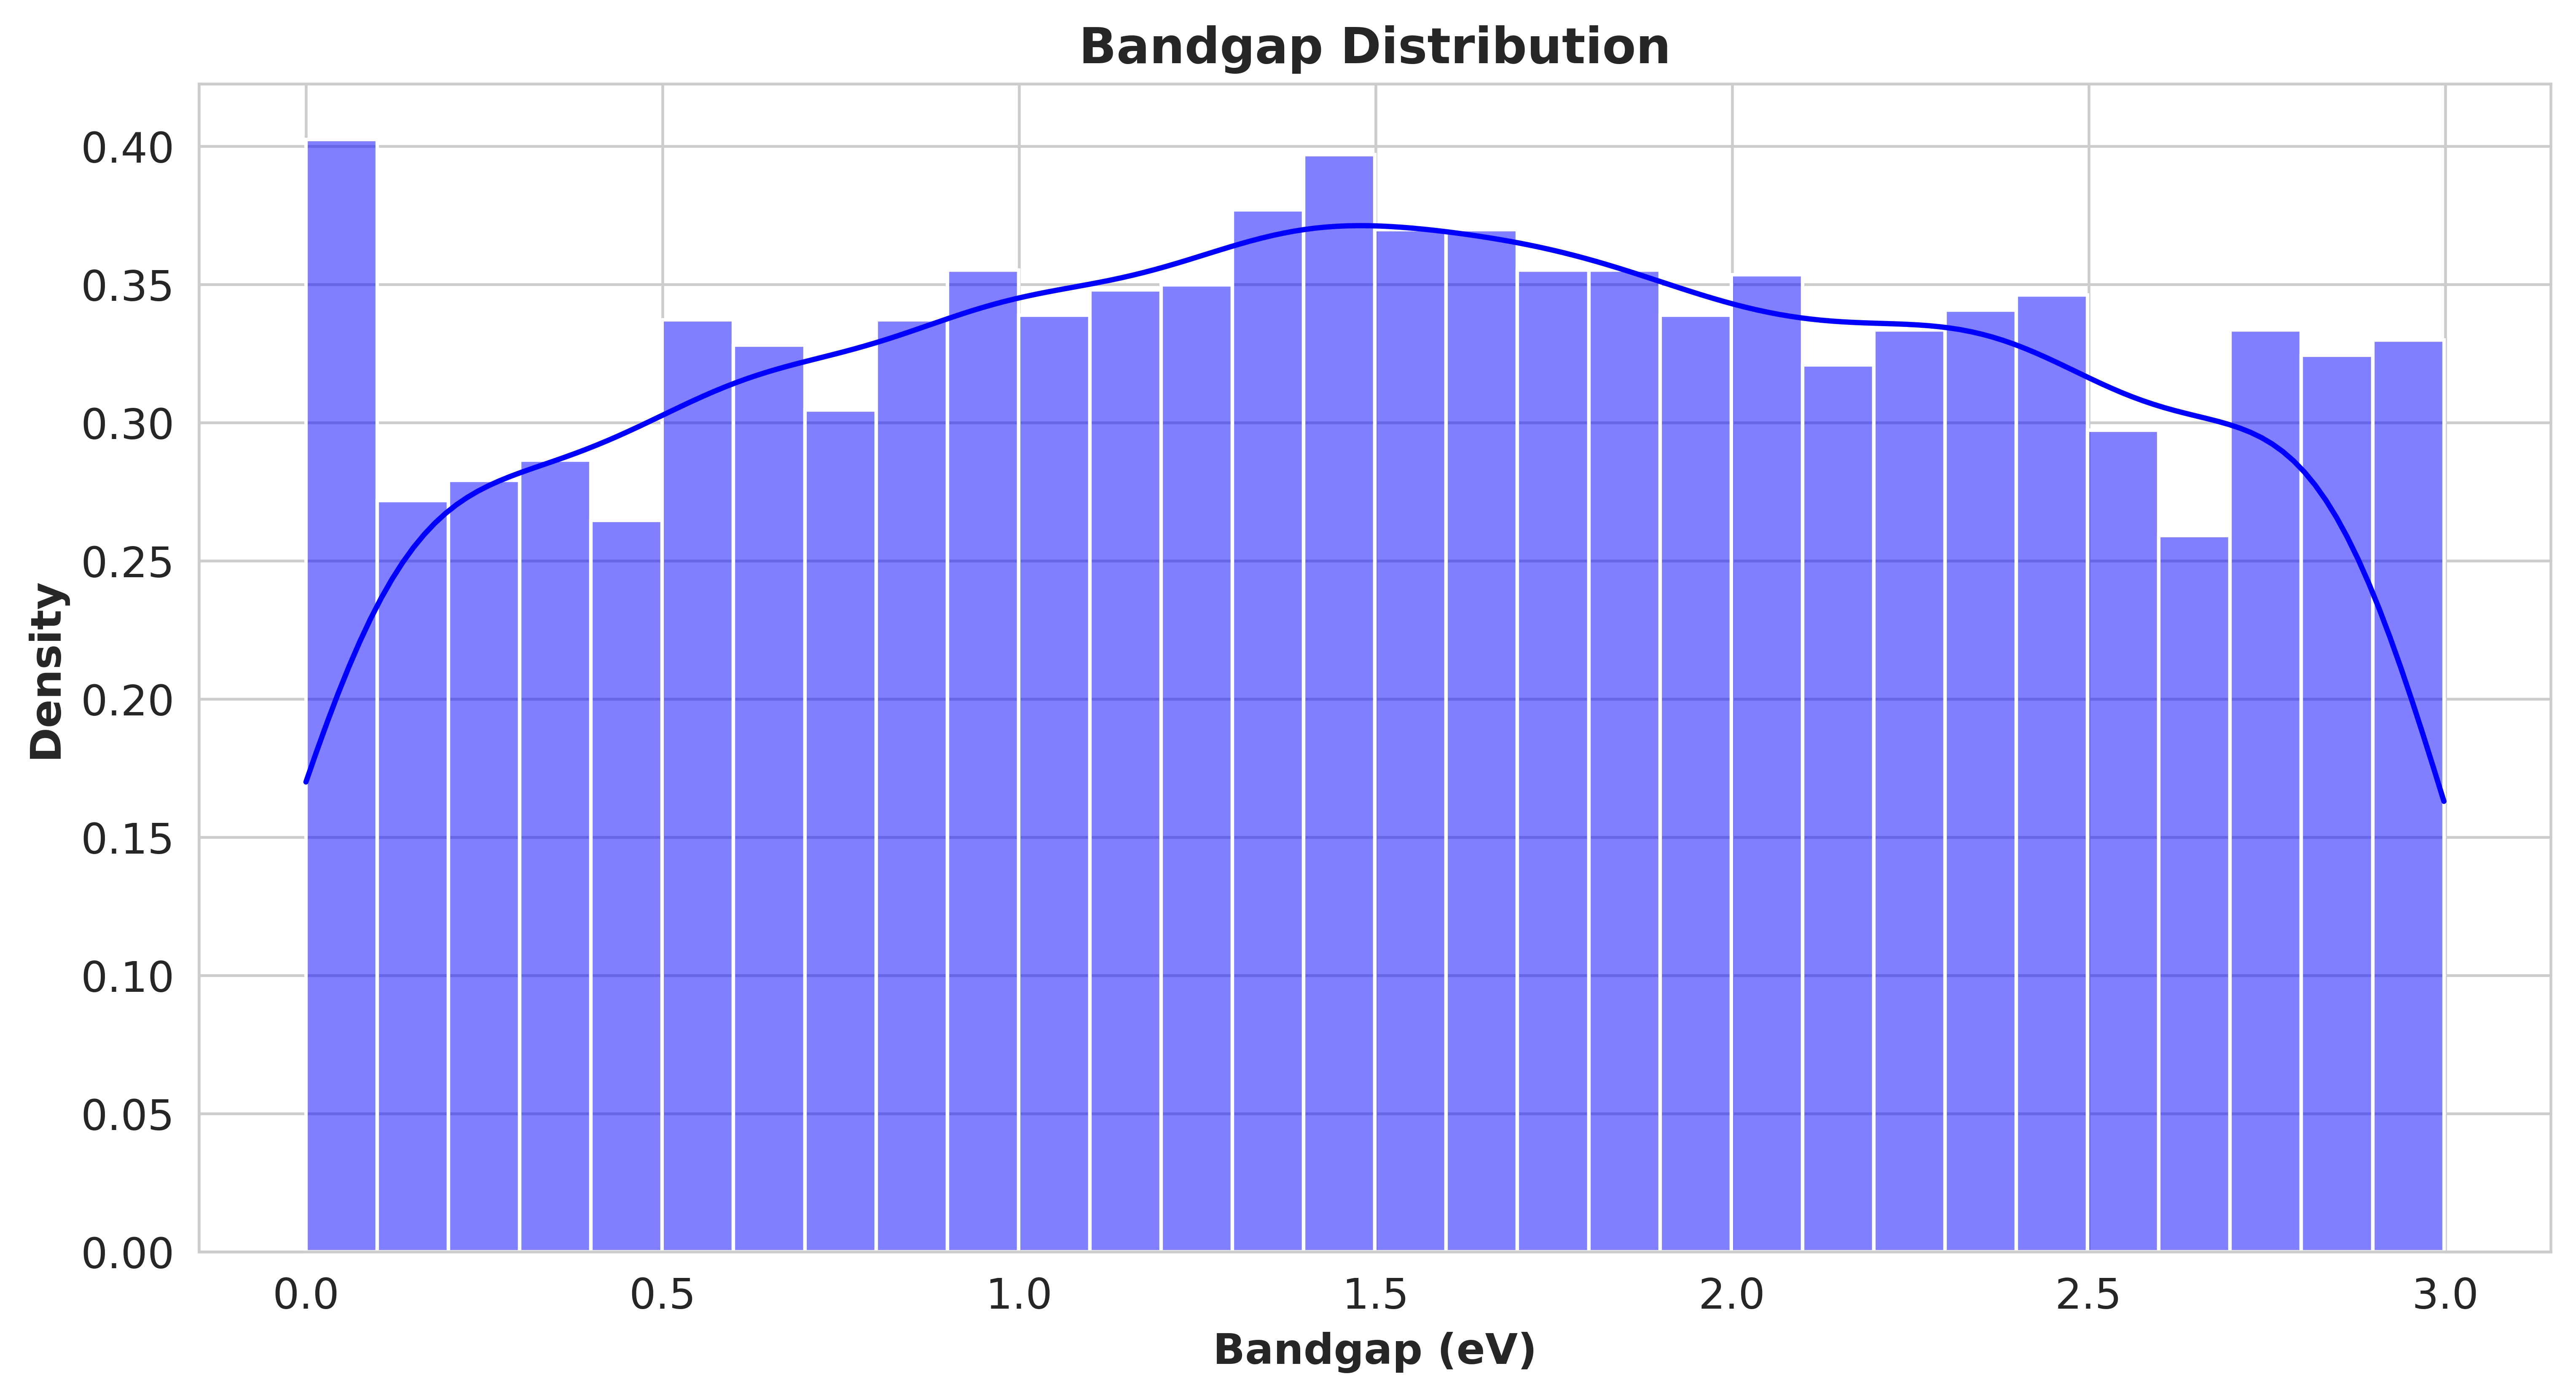

In [16]:
# draw a distribution plot of the bandgap

plt.figure(figsize=(12, 6), dpi=300)
sns.set_style("whitegrid")
sns.set_palette("Set3")  # Set3, RdBu
sns.histplot(data_df['band_gap'], kde=True, bins=30, color='blue', stat='density')
plt.title("Bandgap Distribution", fontsize=14, weight="bold")
plt.xlabel("Bandgap (eV)", fontsize=12, weight="bold")
plt.ylabel("Density", fontsize=12, weight="bold")

# save the figure
plt.savefig(os.path.join(current_dir, './figures/data_distribution/mp/bandgap_distribution.png'), dpi=300)
plt.show()

In [22]:
# 查看数据中氧化物和非氧化物的带隙分布情况
oxides_df = data_df[data_df['composition'].str.contains('O')]
non_oxides_df = data_df[~data_df['composition'].str.contains('O')]

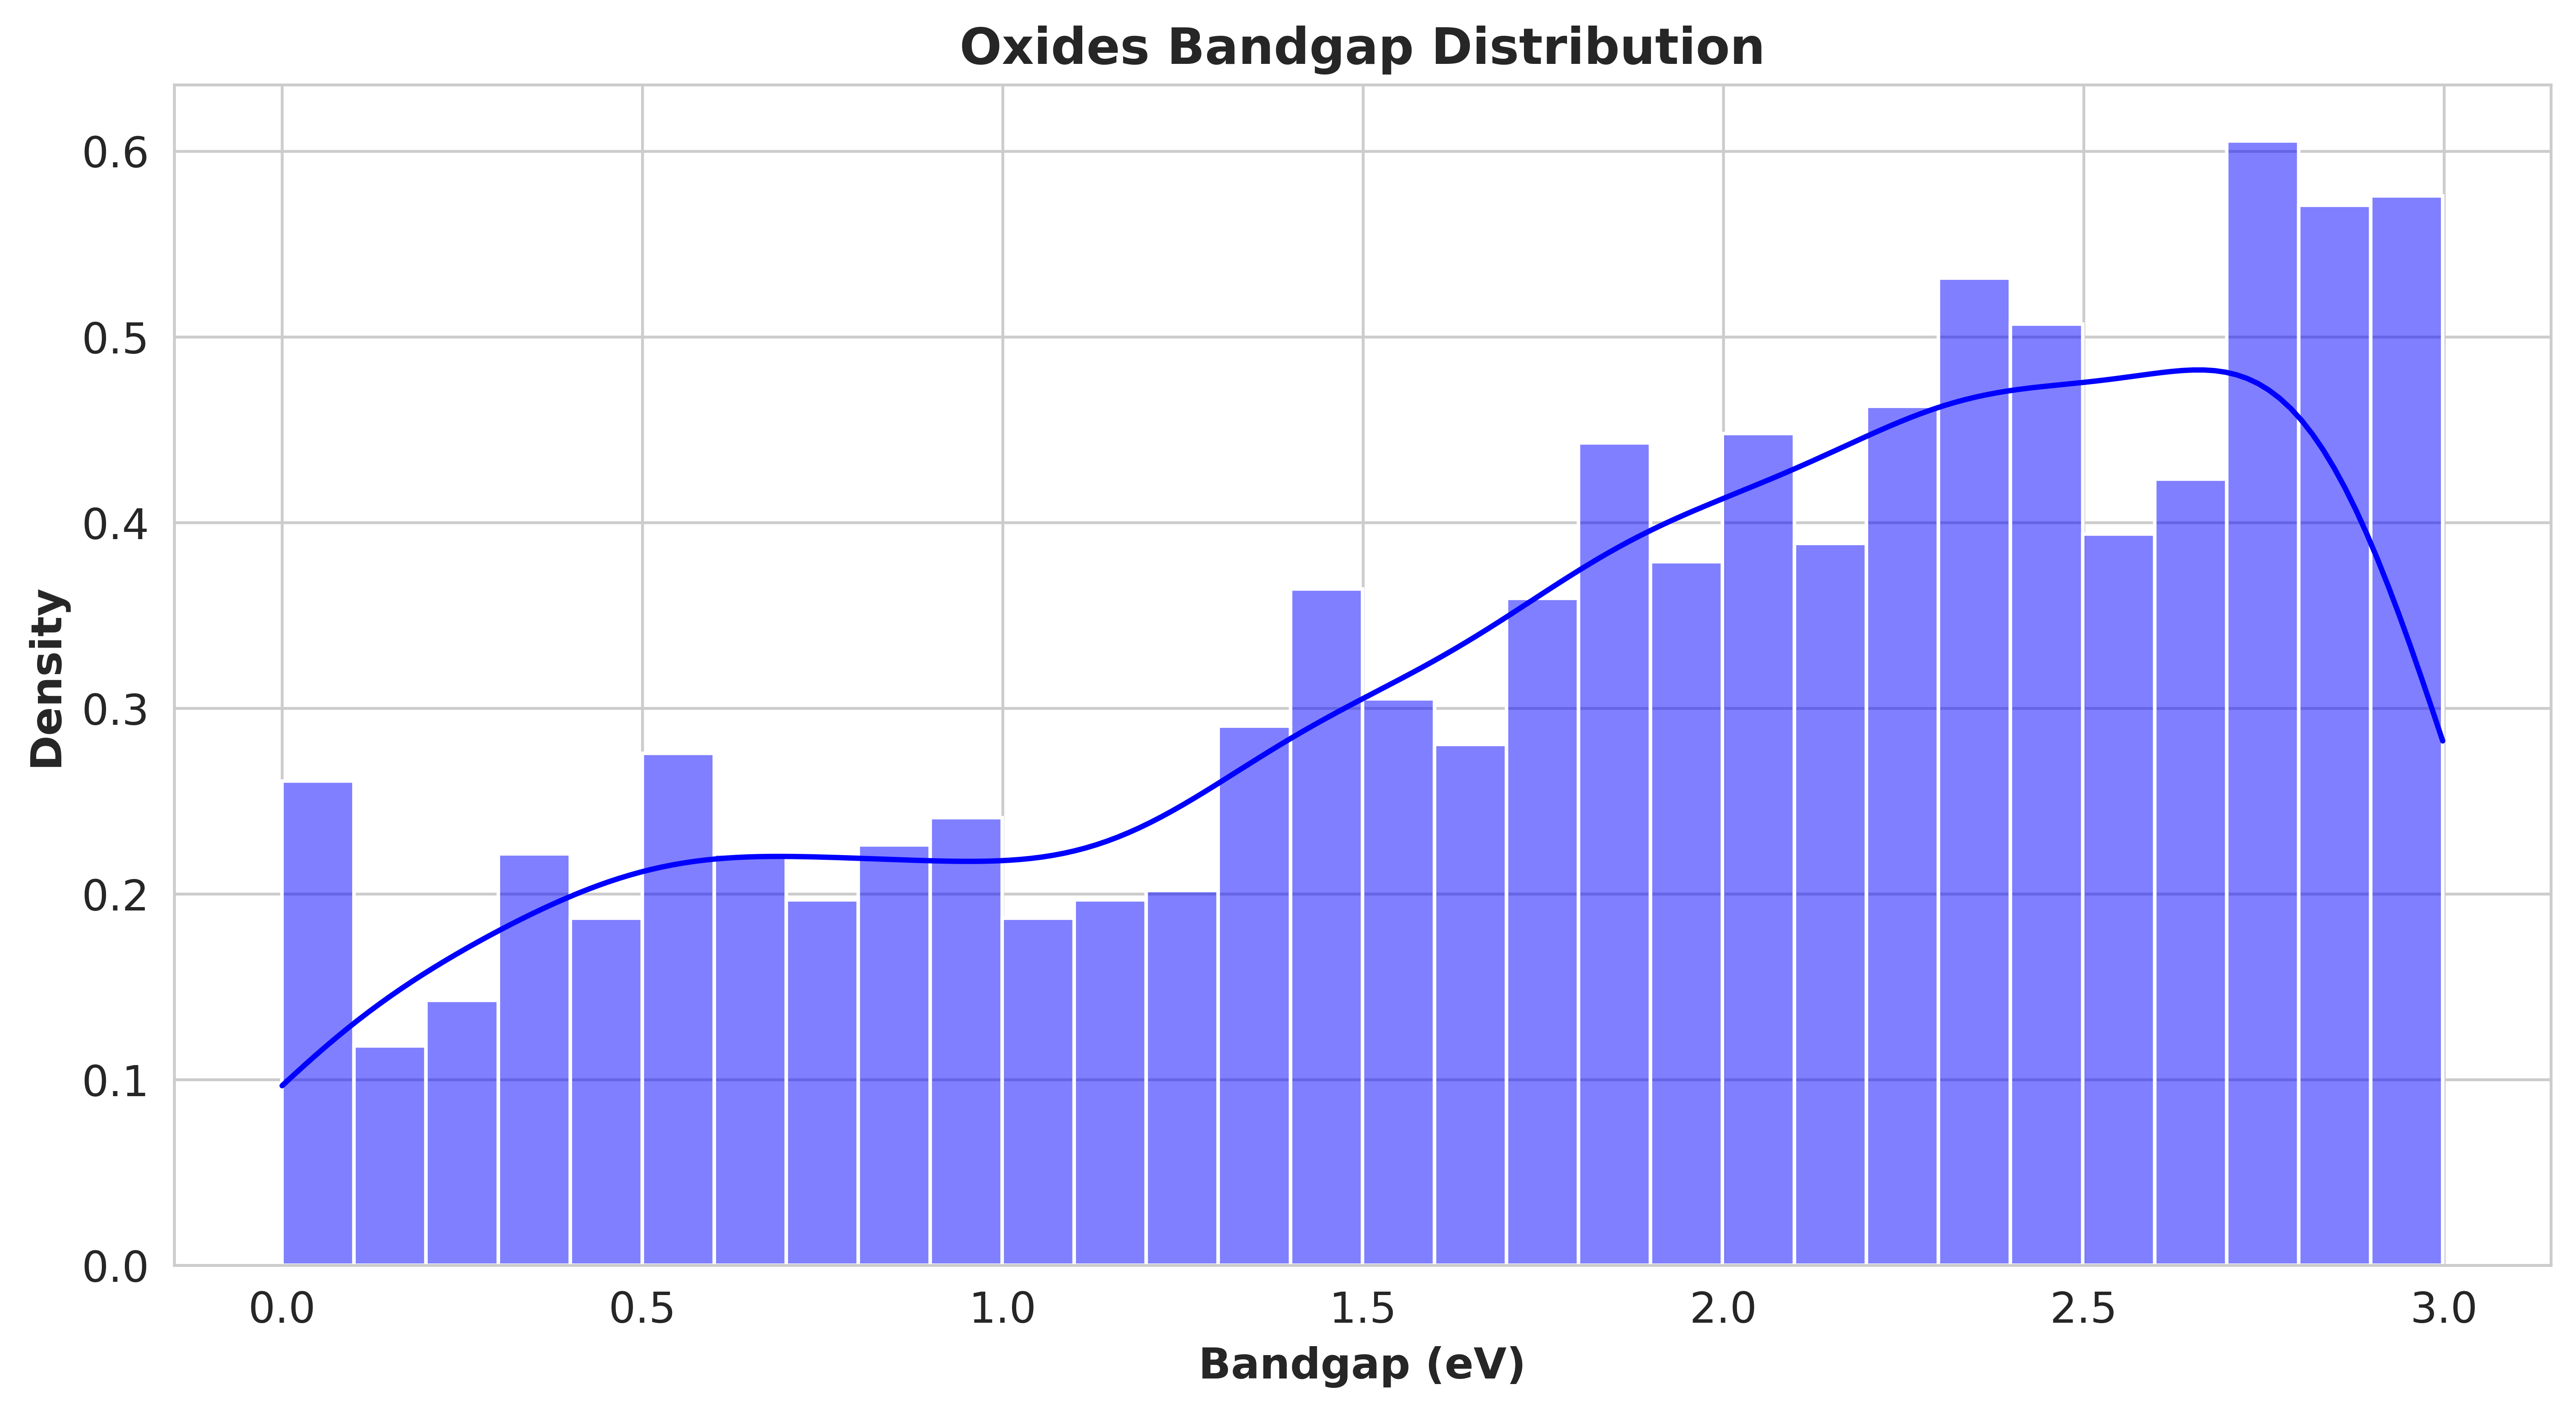

In [ ]:
# draw a distribution plot of the oxides bandgap

plt.figure(figsize=(12, 6), dpi=300)
sns.set_style("whitegrid")
sns.set_palette("Set3")  # Set3, RdBu
sns.histplot(oxides_df['band_gap'], kde=True, bins=30, color='blue', stat='density')
plt.title("Oxides Bandgap Distribution", fontsize=14, weight="bold")
plt.xlabel("Bandgap (eV)", fontsize=12, weight="bold")
plt.ylabel("Density", fontsize=12, weight="bold")

# save the figure
plt.savefig(os.path.join(current_dir, './figures/data_distribution/mp/oxides_bandgap_distribution.png'), dpi=300)
plt.show()

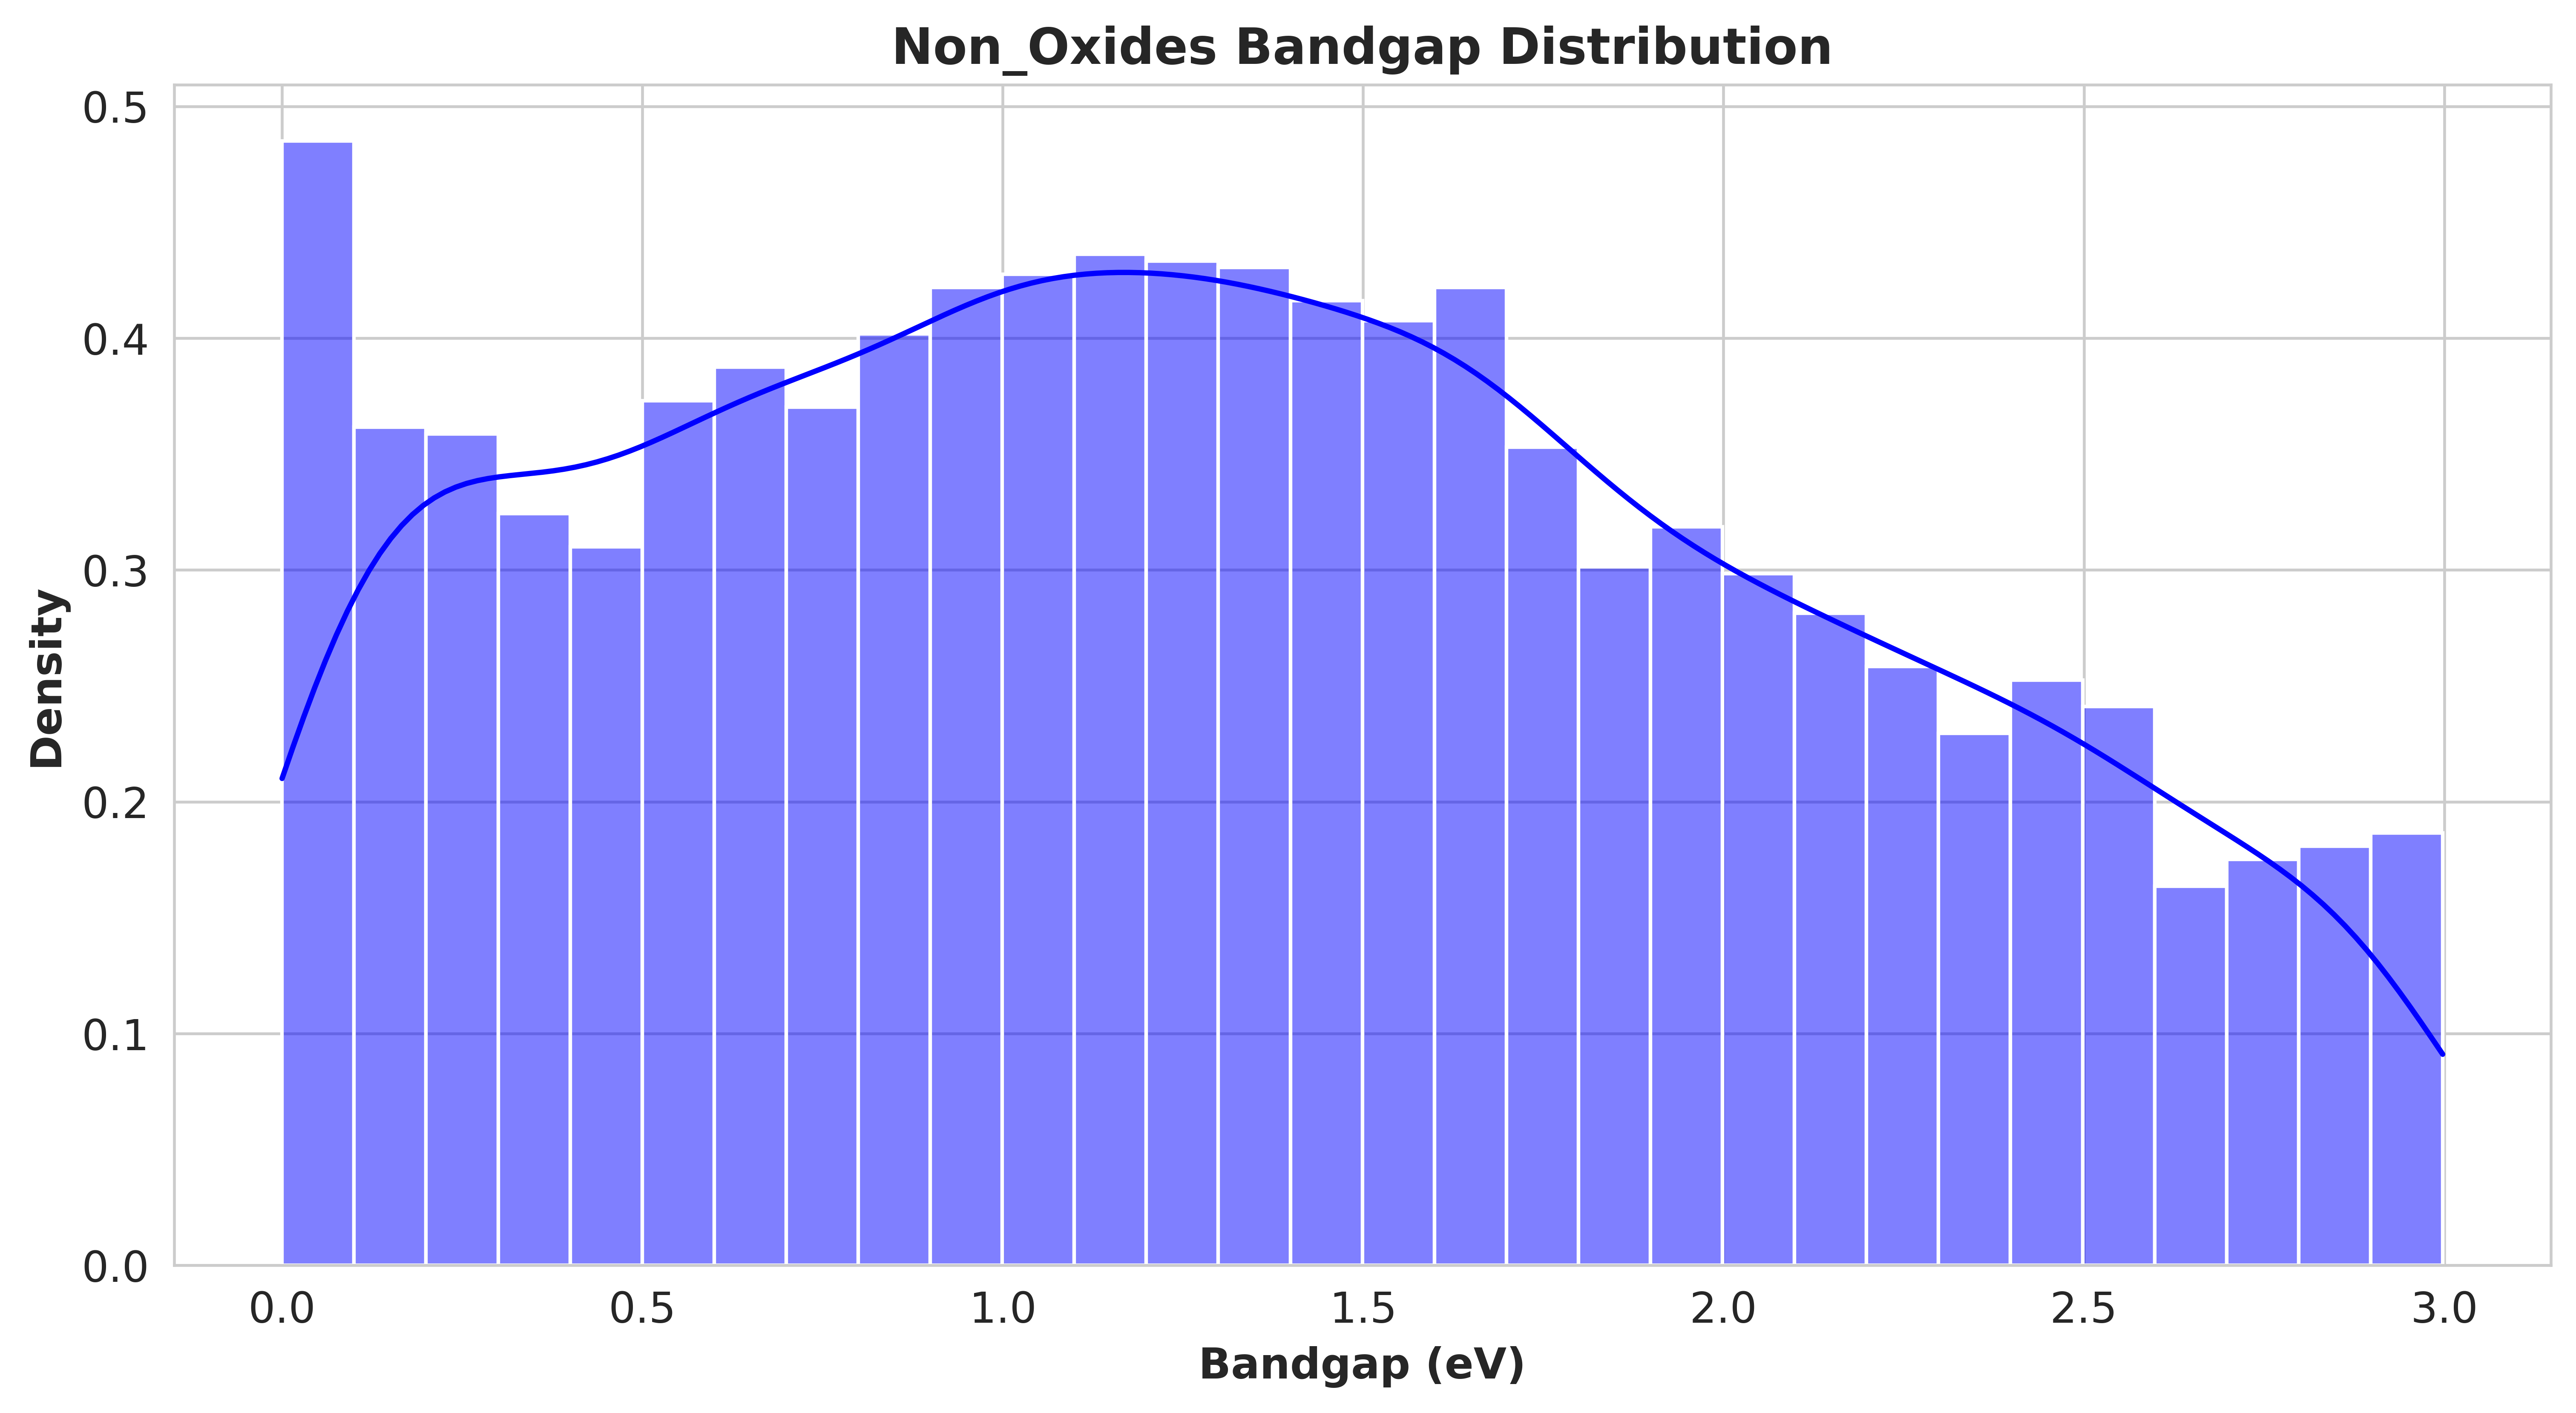

In [29]:
# draw a distribution plot of the non_oxides bandgap

plt.figure(figsize=(12, 6), dpi=300)
sns.set_style("whitegrid")
sns.set_palette("Set3")  # Set3, RdBu
sns.histplot(non_oxides_df['band_gap'], kde=True, bins=30, color='blue', stat='density')
plt.title("Non_Oxides Bandgap Distribution", fontsize=14, weight="bold")
plt.xlabel("Bandgap (eV)", fontsize=12, weight="bold")
plt.ylabel("Density", fontsize=12, weight="bold")

# save the figure
plt.savefig(os.path.join(current_dir, './figures/data_distribution/mp/non_oxides_bandgap_distribution.png'), dpi=300)
plt.show()

### Enumerate the crystal systems as numbers
1. Cubic
2. Tetragonal
3. Hexagonal
4. Orthorhombic
5. Monoclinic
6. Triclinic
7. Trigonal

In [18]:
crystal_system_dict = {
    'Cubic': 0,
    'Tetragonal': 1,
    'Hexagonal': 2,
    'Orthorhombic': 3,
    'Monoclinic': 4,
    'Triclinic': 5,
    'Trigonal': 6
}
data_df['crystal_system'] = data_df['crystal_system'].replace(crystal_system_dict)

/tmp/ipykernel_2699/132375706.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df['crystal_system'] = data_df['crystal_system'].replace(crystal_system_dict)


In [20]:
# 将is_gap_direct转换为0和1，浮点数
data_df['is_gap_direct'] = data_df['is_gap_direct'].astype(float)

In [30]:
# 增加氧化物和非氧化物的标签
data_df['is_oxide'] = 0
data_df.loc[data_df['composition'].str.contains('O'), 'is_oxide'] = 1
data_df['is_oxide'] = data_df['is_oxide'].astype(float)

In [31]:
data_df.head()

,material_id,composition,nsites,crystal_system,space_group,volume,density,density_atomic,efermi,energy_per_atom,formation_energy_per_atom,is_gap_direct,band_gap,is_oxide
0,mp-567334,Ag8 B48 Cl48,104,0,205,1920.521818,2.666186,18.466556,0.446000,-8.609923,-0.736951,1.0,2.7028,0.0
1,mp-568392,Ag40 Te16 Br12,68,3,63,1688.336988,7.194734,24.828485,2.536429,-3.067222,-0.366432,0.0,0.8722,0.0
2,mp-560328,Ag30 P8 S32 Cl6,76,0,220,1709.591255,4.587131,22.494622,2.458781,-4.062215,-0.481548,0.0,1.2888,0.0
3,mp-4691,Ag4 C2 O6,12,4,11,150.041421,6.103459,12.503452,1.709619,-6.049623,-1.089885,0.0,0.4736,1.0
4,mp-1196546,Ag12 Ge6 S36 O126,180,6,147,2544.837686,3.197654,14.137987,0.457826,-6.234630,-1.599755,0.0,2.8072,1.0


In [33]:
# Save the raw data to a csv file
file_path = os.path.join(current_dir, './Data/mp_eda_data.csv')
data_df.to_csv(file_path, index=False)